# Chaos in iterated function systems

The iterated function systems that we've looked at *look* simple: at least, their equationd are simple and don't involve any mathematical complicated ideas. But it turns out that their *behaviours* can be anything *but* simple, and in this notebook we'll explore the most exciting and complex behaviour or all &ndash; *chaos* &ndash; that lurks unexpectedly within the logistic map. 

In [1]:
# numpy
import numpy

# plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt

## Iterated function systems again

As our test case we'll stick with the simple logistic map:

$$
y(x) = r x (1 - x / K)
$$

where $r$ and $K$ are parameters.

In [2]:
def make_logistic(r, K):
    '''Create a logistic growth model.
    
    :param r: the growth factor
    :param K: the limiting factor
    :returns: the map'''
    
    def logistic(Nprime):
        '''Return the value of the loigistic map rx(1 - x/K).'''
        return r * Nprime * (1 - Nprime / K)
        
    return logistic

We need to have the "raw" funciton available to show the fixedpoint iterations.

In [3]:
def plotFunctionWithXY(ax, xs, f, linestyle, label=False):
    ax.plot(xs, list(map(f, xs)), linestyle)

    xmin, xmax = min(xs), max(xs)
    ax.plot([xmin, xmax], [xmin, xmax],
            color="0.5", linestyle='dotted')
    if label:
        ax.annotate('$x_t = x_{t - 1}$', [xmax * 0.75, xmax * 0.75],
                    [10, 0.0], textcoords='offset points')

## The significance of $r$

We have already shown the behaviour of the logistic map for sample values of $r$ and $K$. It's natural to think that the systemn will always converge, since the function has the same basic shape for all values of $r$. Natural &ndash; but as it turns out, wrong. It turns out that the value of the parameter $r$ strongly affects the evolution of a point from its initial conditions &ndash; and this change is *qualitative* in the sense of introducing completely new behaviours.

Let's explore the behaviour of iterating the system for several values of $r$, leaving $K = 1$ and always starting from an initial point $x_0 = 0.1$. We'll plot a simple version of the cobweb plot that just plots the "bounces" of the trajectory, without extending to the axes.

In [4]:
def plotSpider(ax, f, x0, t, c='g', linewidth=1):
    x_t = x0
    for i in range(t):
        x_tm1 = x_t
        x_t = f(x_t)
    
    ax.plot([x_tm1, x_tm1], [x_tm1, x_t],
            color=c, linestyle='solid', linewidth=linewidth)
    ax.plot([x_tm1, x_t], [x_t, x_t],
            color=c, linestyle='solid', linewidth=linewidth)

    return x_t

We'll start with four values of $r$.

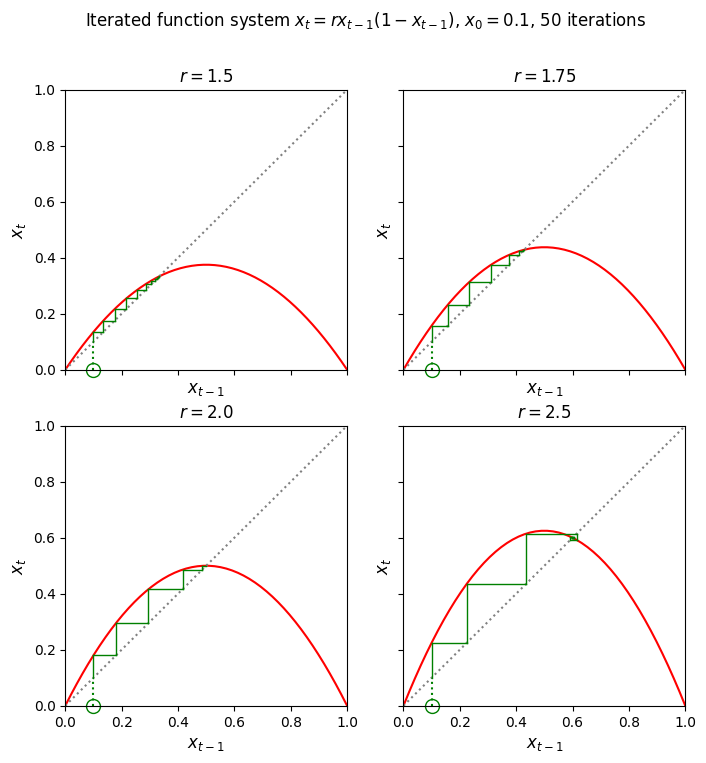

In [5]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))

x_0 = 0.1
xs = numpy.linspace(0.0, 1.0)
rs = [1.5, 1.75, 2.0, 2.5]
for i in range(len(rs)):
    r = rs[i]
    ax = axs[int(i / 2)][i % 2]
    
    N = make_logistic(r, 1.0)
    plotFunctionWithXY(ax, xs, N, 'r-')

    ax.plot([x_0], [0.0], 
            color='g', marker='o', markersize=10, fillstyle='none', clip_on=False)
    ax.plot([x_0, x_0], [0.0, x_0],
            color='g', linestyle='dotted')
    for t in range(1, 50):
        x_t = plotSpider(ax, N, x_0, t, 'g')

    ax.set_title(f'$r = {r}$')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('$x_{t - 1}$')
    ax.set_ylabel('$x_t$')
    
fig.suptitle("Iterated function system $x_t = r x_{t - 1} (1 - x_{t - 1})$, $x_0 = 0.1$, 50 iterations")
plt.show()

This is the behaviour we've come to expect, with the trajectory converging on a fixpoint. The case where $r = 2.5$ seems to show the point spiraling in to the critical point, and maybe that's something we should look at further. What happens as we gradually increase $r$?

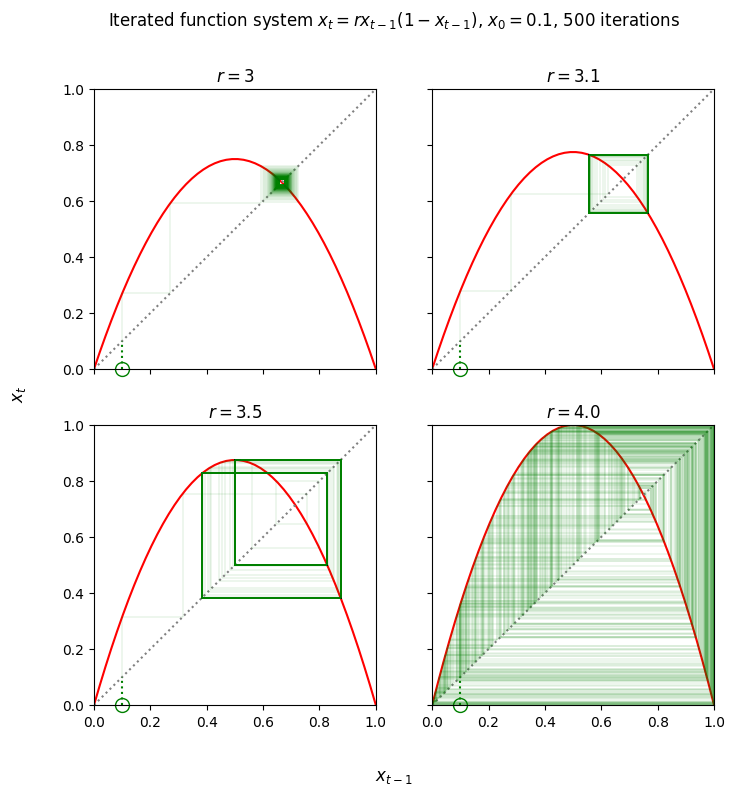

In [6]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
gax = plt.gca()

x_0 = 0.1
rs = [3, 3.1, 3.5, 4.0]
for i in range(len(rs)):
    r = rs[i]
    ax = axs[int(i / 2)][i % 2]
    
    N = make_logistic(r, 1.0)
    plotFunctionWithXY(ax, xs, N, 'r-')

    ax.plot([x_0], [0.0], 
            color='g', marker='o', markersize=10, fillstyle='none', clip_on=False)
    ax.plot([x_0, x_0], [0.0, x_0],
            color='g', linestyle='dotted')
    for t in range(1, 500):
        x_t = plotSpider(ax, N, x_0, t, 'g', linewidth=0.1)

    ax.set_title(f'$r = {r}$')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])

fig.supxlabel('$x_{t - 1}$')
fig.supylabel('$x_t$')
fig.suptitle("Iterated function system $x_t = r x_{t - 1} (1 - x_{t - 1})$, $x_0 = 0.1$, 500 iterations")

plt.show()

Oh wow.

How should we interpret these plots? In each case it looks like the trajectory fails to stabilise on a fixedpoint. I've plotted the individual iterations wuite faintly, which makes the structure stand out more clearly. In the case of $r = 3.1$ se we can the trajectory seem to settle into a stable "orbit" after a while, bounding between two values. For $r = 3.5$ the orbit is clearly more complicated, bouncing between four values. But for $r = 4.0$ it seems to *never* settle down: in fact you could convince yourself that the trajectory line never intersects itself and just keeps filling in the space.

## Bifurcation diagrams

Looking back at these plots, we can see that the system trajectory goes from a single equilibrium point to a more complicated structure where the trajectory bounces between two values, and then to four values &ndash; and then to something else. We refer to the repeated values as *orbits*: the trajectory falls into pattern that is repeated but doesn't actually stop moving.

We can look at this structure in more detail using a plot called a *bifurcation diagram*. To construct this we look at how $r$ affects the trajectories of the system by capturing the states it falls into &ndash; the repeated values, if any &ndash; after it has had chance to stabilise.

For each value of $r$ we create a logistic map and run it from the *same* initial startinmg point. We ignore the first few hundred steps to ignore the inevitable noise at the start of the iterations, and then plot the values in a column: a point at each value. This will show us the values that occur in the long term for each value of $r$.

There's a useful trick we can use to extract even more information, which is to plot each point with high transparency. This means that individual points are quite subtle, but &ndash; if the same value appears repeatedly &ndash; the transparencies will build up and we'll see a darker value.

/var/folders/yf/vnpx3pvd51gfpg_sjjm11s9m0000gq/T/ipykernel_36043/4072876025.py:10: RuntimeWarning: overflow encountered in scalar multiply
  return r * Nprime * (1 - Nprime / K)


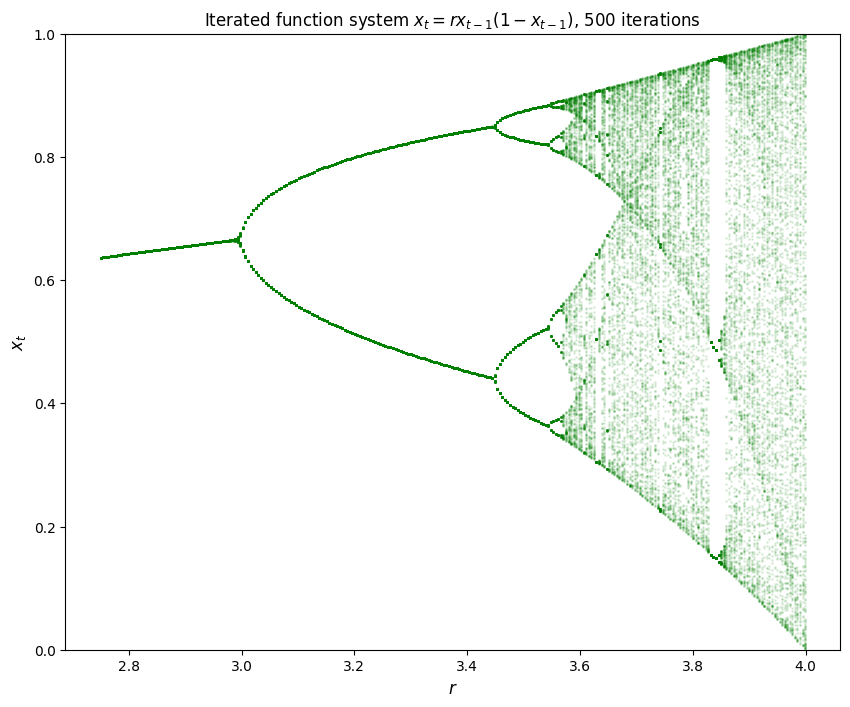

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

x_0 = 0.1
for r in numpy.linspace(2.75, 5.0, num=500):
    N = make_logistic(r, 1.0)

    x_t = x_0
    for i in range(500):
        x_tm1 = x_t
        x_t = N(x_t)
        
        # discard the first 250 iterations to allow the system to stabilise
        # (if it's going to)
        if i > 250:
            ax.plot([r], [x_t],
                    color='g', marker='o', markersize=1, fillstyle='full', alpha=0.1)
 
ax.set_title("Iterated function system $x_t = r x_{t - 1} (1 - x_{t - 1})$, 500 iterations")
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('$r$')
ax.set_ylabel('$x_t$')

plt.show()

How do we interpret this diagram? At low values of $r$ the system stabilises immediately to a single equilibrium point. As $r$ increases from left to right, this stability breaks and the system transforms into one of two possible values (the upper and lower branches). Farther along again at these stable branches each split again into two possibilities, and then again &ndash; and then the stability splits apart and we see that the system takes essentially *any* value. Progressing further, it looks like a new "island" of stability appears with *three* possible values, before the chaos re-asserts itself.

The splits in the stable values in the state space are called *bifurcations*. These bifurcation diagrams only work when considering a single variable, but they can highlight the ways  in which stability changes over a range of parameters.